# Alternus Vera Project

### Golnaz Bidabadi  (008022755)



# Fakenews Detection using "Title-Body-Correlation"

One of the potential ways of detecting fake news is to study the correlation between the title and the body of a news. 


# Data Enrichment

In the followings, I'm going to combine two datasets in order to make an enriched dateset for fakenews. 
The following two datasets were used:

### "Getting Real about Fake News" Dataset
The data set is available on Kaggle (https://www.kaggle.com/mrisdal/fake-news) and includes "Text & metadata from fake & biased news sources around the web". Since the dataset does not include "unbiased" or "true" news, the "Fake News Challenge" dataset was used to enrich its data.

**Hypotheses:**  For the purpose of this experiment I consider the label "agree" in the "Fake News Challenge" dataset as "True" when added the data to the . 

- Agrees: "The body text agrees with the headline" (As defined by http://www.fakenewschallenge.org/)

### "FakeNewsChallenge" dataset
This dataset is available on Github (https://github.com/FakeNewsChallenge/fnc-1) and has been published by http://www.fakenewschallenge.org/. I only used the "agree"-labled news data of this dataset to enrich the "Getting Real about Fake News" dataset. 

## Loading the "Getting Real about Fake News" Dataset

In [1]:
import pandas as pd

!pip install -q gensim

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import seaborn as sb

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

import numpy as np
np.random.seed(2015)

path_fake='https://humans.ocloud.de/index.php/s/AcXKYFsNcJfCmKr/download'

fake_data = pd.read_csv(path_fake, header = 0)
fake_data.head()

[nltk_data] Downloading package wordnet to /Users/Soheil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \nFox News Sunday reported this mo...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US      25689.0   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US      25689.0   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US      25689.0   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US      25689.0   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US      25689.0   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
3  http://100percentfedup.com/wp-content/uploads/...              0   
4  http://100percentfedup.com/wp-content/uploads/...              0   

   participants_count  likes  comments  shares  type  
0                   1      0         0       0  bias  
1                   1      0         0       0  bias  
2                   1      0         0       0  bias  
3                   0      0         0       0  bias  
4                   0      0         0       0  bias

## Loading the "FakeNewsChallenge" Dataset (ToDo)

In [2]:
path_fnc_training_body='https://humans.ocloud.de/index.php/s/ywM5Se5jq8NnqEF/download'

fnc_training_body_data = pd.read_csv(path_fnc_training_body, header = 0)
fnc_training_body_data.head()

Body ID                                        articleBody
0        0  A small meteorite crashed into a wooded area i...
1        4  Last week we hinted at what was to come as Ebo...
2        5  (NEWSER) – Wonder how long a Quarter Pounder w...
3        6  Posting photos of a gun-toting child online, I...
4        7  At least 25 suspected Boko Haram insurgents we...

In [3]:
path_fnc_training_stances='https://humans.ocloud.de/index.php/s/LWeBX5Ns7PGrSBG/download'

fnc_training_stances_data = pd.read_csv(path_fnc_training_stances, header = 0)
fnc_training_stances_data.head()

Headline  Body ID     Stance
0  Police find mass graves with at least '15 bodi...      712  unrelated
1  Hundreds of Palestinians flee floods in Gaza a...      158      agree
2  Christian Bale passes on role of Steve Jobs, a...      137  unrelated
3  HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated
4  Spider burrowed through tourist's stomach and ...     1923   disagree

In [4]:
fnc_training_data = fnc_training_body_data.merge(fnc_training_stances_data, left_on='Body ID', right_on='Body ID', how='inner')

fnc_training_data.head()

Body ID                                        articleBody  \
0        0  A small meteorite crashed into a wooded area i...   
1        0  A small meteorite crashed into a wooded area i...   
2        0  A small meteorite crashed into a wooded area i...   
3        0  A small meteorite crashed into a wooded area i...   
4        0  A small meteorite crashed into a wooded area i...   

                                            Headline     Stance  
0  Soldier shot, Parliament locked down after gun...  unrelated  
1  Tourist dubbed ‘Spider Man’ after spider burro...  unrelated  
2  Luke Somers 'killed in failed rescue attempt i...  unrelated  
3   BREAKING: Soldier shot at War Memorial in Ottawa  unrelated  
4  Giant 8ft 9in catfish weighing 19 stone caught...  unrelated

In [5]:
fnc_agreed_data = fnc_training_data[fnc_training_data.Stance=='agree']

fnc_agreed_data.head()

Body ID                                        articleBody  \
24         0  A small meteorite crashed into a wooded area i...   
199        8  There is so much fake stuff on the Internet in...   
241        9  (CNN) -- A meteorite crashed down in Managua, ...   
242        9  (CNN) -- A meteorite crashed down in Managua, ...   
363       13  A SOLDIER has been shot at Canada’s National W...   

                                              Headline Stance  
24   Small Meteorite Strikes in Nicaragua's Capital...  agree  
199  What was fake on the Internet this week: Obama...  agree  
241  Meteorite makes big crater in Nicaragua, gover...  agree  
242  Small Meteorite Strikes in Nicaragua's Capital...  agree  
363  A soldier has been shot at Canada’s war memori...  agree

## Adding the Agree-labled news to the "Getting Real about Fake News" dataset 
The agree-labled data was considered as "true"

In [6]:
# Dropping the coloumns that are not needed from both datasets

fnc_agreed_data = fnc_agreed_data.drop(columns=['Body ID'])
fnc_agreed_data.head()

articleBody  \
24   A small meteorite crashed into a wooded area i...   
199  There is so much fake stuff on the Internet in...   
241  (CNN) -- A meteorite crashed down in Managua, ...   
242  (CNN) -- A meteorite crashed down in Managua, ...   
363  A SOLDIER has been shot at Canada’s National W...   

                                              Headline Stance  
24   Small Meteorite Strikes in Nicaragua's Capital...  agree  
199  What was fake on the Internet this week: Obama...  agree  
241  Meteorite makes big crater in Nicaragua, gover...  agree  
242  Small Meteorite Strikes in Nicaragua's Capital...  agree  
363  A soldier has been shot at Canada’s war memori...  agree

In [7]:
# Dropping the coloumns that are not needed from both datasets

fake_data = fake_data.drop(columns=['uuid', 'ord_in_thread','author', 'published', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares'])
fake_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  
0  Print They should pay all the back all the mon...  bias  
1  Why Did Attorney General Loretta Lynch Plead T...  bias  
2  Red State : \nFox News Sunday reported this mo...  bias  
3  Email Kayla Mueller was a prisoner and torture...  bias  
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias

In [8]:
#changing the coloumn names to make them consistent with the other dataset
fnc_agreed_data.columns = ['text', 'title', 'type']
fnc_agreed_data.head()

text  \
24   A small meteorite crashed into a wooded area i...   
199  There is so much fake stuff on the Internet in...   
241  (CNN) -- A meteorite crashed down in Managua, ...   
242  (CNN) -- A meteorite crashed down in Managua, ...   
363  A SOLDIER has been shot at Canada’s National W...   

                                                 title   type  
24   Small Meteorite Strikes in Nicaragua's Capital...  agree  
199  What was fake on the Internet this week: Obama...  agree  
241  Meteorite makes big crater in Nicaragua, gover...  agree  
242  Small Meteorite Strikes in Nicaragua's Capital...  agree  
363  A soldier has been shot at Canada’s war memori...  agree

In [9]:
#changing the order of the coloumns to make them consistent with the other dataset

fnc_agreed_data = fnc_agreed_data[['title', 'text', 'type']]
fnc_agreed_data.head()

title  \
24   Small Meteorite Strikes in Nicaragua's Capital...   
199  What was fake on the Internet this week: Obama...   
241  Meteorite makes big crater in Nicaragua, gover...   
242  Small Meteorite Strikes in Nicaragua's Capital...   
363  A soldier has been shot at Canada’s war memori...   

                                                  text   type  
24   A small meteorite crashed into a wooded area i...  agree  
199  There is so much fake stuff on the Internet in...  agree  
241  (CNN) -- A meteorite crashed down in Managua, ...  agree  
242  (CNN) -- A meteorite crashed down in Managua, ...  agree  
363  A SOLDIER has been shot at Canada’s National W...  agree

In [10]:
all_data = fake_data.append(fnc_agreed_data)
all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  
0  Print They should pay all the back all the mon...  bias  
1  Why Did Attorney General Loretta Lynch Plead T...  bias  
2  Red State : \nFox News Sunday reported this mo...  bias  
3  Email Kayla Mueller was a prisoner and torture...  bias  
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias

# Data Analysis

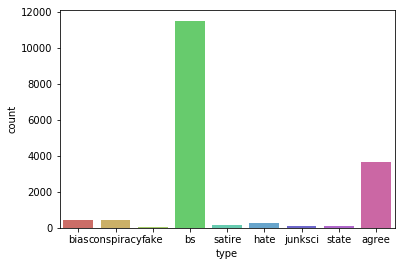

In [11]:
#Checking the distribution of the classes based on the "type"
sb.countplot(x='type', data=all_data, palette='hls')

# Data Cleaning and prepration
Removing null values



In [12]:
all_data.isnull().sum()

title    680
text      46
type       0
dtype: int64

In [13]:
all_data = all_data.dropna(how="any").reset_index(drop=True)

In [14]:
all_data.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [15]:
all_data.shape[0] #get number of rows

15951

# Data Pre-processing 

The following steps are taken for the text data preprocessing

1. Spell check and stop words removal
2. Stemming
3. Lemmatization
4. Removing Punctuations

In [16]:
snowball_stemmer = SnowballStemmer('english')

def preprocessor(input):
    output = []
    #removing all non-alphabetic (numbers and punctuations) tokens, short tokens (size less than 3 characters) and stopwords
    for token in gensim.utils.simple_preprocess(input):
        if token.isalpha() and len(token) > 3 and token not in gensim.parsing.preprocessing.STOPWORDS:
            output.append(snowball_stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')))
    return output

preprocessed_titles = all_data['title'].map(preprocessor)

In [17]:
preprocessed_titles[:4]

0              [muslim, bust, steal, million, benefit]
1    [attorney, general, loretta, lynch, plead, fifth]
2    [break, weiner, cooper, hillari, email, investig]
3    [drop, speech, father, daughter, kidnap, kill,...
Name: title, dtype: object

In [18]:
preprocessed_bodies = all_data['text'].map(preprocessor)

In [19]:
preprocessed_bodies[:4]

0    [print, money, plus, entir, famili, come, need...
1    [attorney, general, loretta, lynch, plead, fif...
2    [state, news, sunday, report, morn, anthoni, w...
3    [email, kayla, mueller, prison, tortur, isi, c...
Name: text, dtype: object

# Data Visualization

## Word Cloud Visualization for getting a sense of the titles and bodies
Using word cloud visualisation to see how the preprocessing changes the dynamics of the most frequent words in the dataset by presenting one before the pre-processing and one after it's done. 

In [20]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Word Cloud on titles before preprocessing

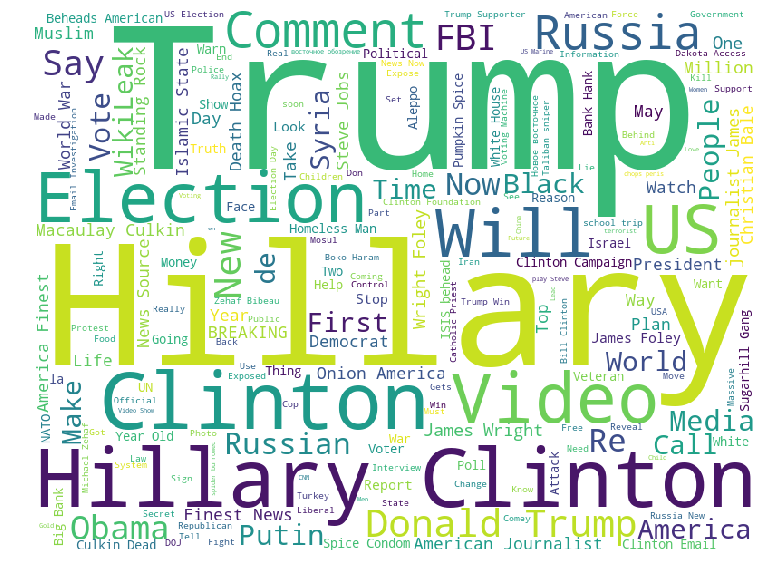

In [21]:
cloud(' '.join(all_data['title']))

# Word Cloud on titles after preprocessing

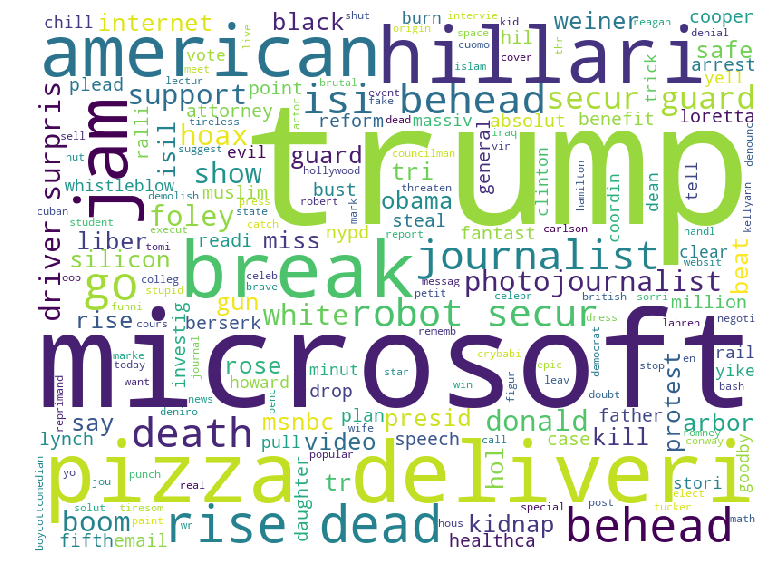

In [22]:
cloud(str(preprocessed_titles))


# Word Cloud on text-bodies before preprocessing

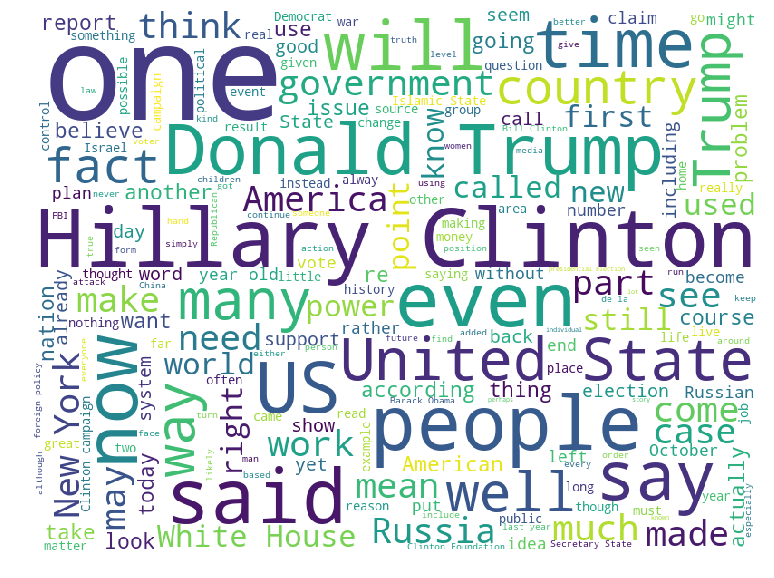

In [23]:
cloud(' '.join(all_data['text']))


# Word Cloud on text-bodies after preprocessing

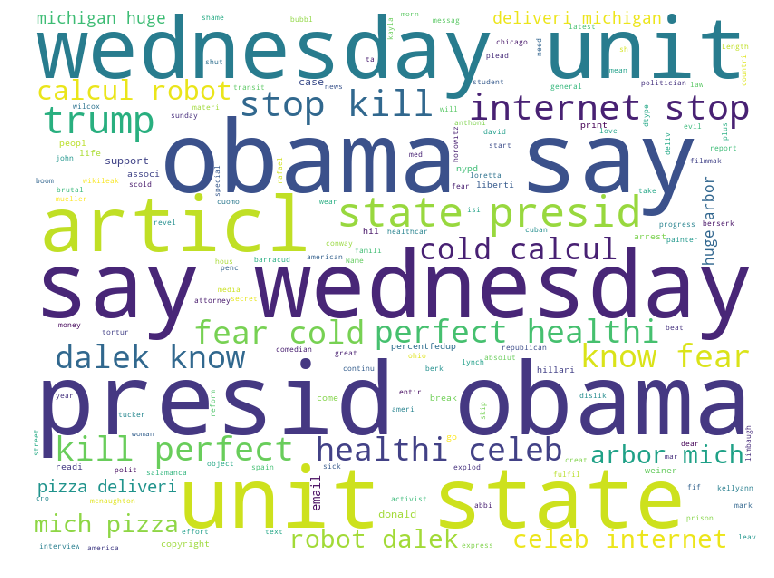

In [24]:
cloud(str(preprocessed_bodies))


# Distillation and Feature Engineering
Beyond basic features such as bag of words (BOW) and TF-IDF,  the following features are also extracted for titles and bodies: 
 
### - **Doc2Vec Embedding**
### - **Cosine similarity between title and body of every news
### - LDA using BoW
### - LDA using TF-IDF
### - Sentiment
### - Sentiment correlation between titles and bodies
### - Cosine similarity between titles and bodies based on 10-dimensional LDA vectors

#### My aim is to try to look at sub-areas and embeddings (latent variables) within the factor topics, sentiments, and others others so that additional features and parameters are extracted in order to help assessing the factor better..  This would potentially provide the ability to get a higher accuracy score for the "Title-body-correlation"factor.


# Bag of Words
Converting a corpus to a vector format using the bag-of-words approach, where each unique word in a text will be represented by one number. Then we can use it to extract features from text data to use for modeling.

In [25]:
from collections import Counter
list_of_words_in_titles = [item for sublist in preprocessed_titles for item in sublist]
bow_titles =  Counter(list_of_words_in_titles)
print(bow_titles)

Counter({'trump': 1812, 'hillari': 1286, 'clinton': 1205, 'elect': 778, 'video': 719, 'news': 516, 'isi': 497, 'american': 455, 'obama': 449, 'russia': 427, 'say': 419, 'comment': 407, 'email': 404, 'america': 398, 'world': 397, 'break': 379, 'report': 379, 'vote': 373, 'year': 346, 'state': 345, 'donald': 319, 'dead': 296, 'presid': 289, 'jam': 267, 'time': 257, 'kill': 252, 'hoax': 252, 'death': 247, 'watch': 245, 'behead': 245, 'russian': 233, 'wikileak': 233, 'attack': 231, 'campaign': 225, 'claim': 225, 'foley': 222, 'media': 220, 'reveal': 216, 'polic': 214, 'syria': 214, 'putin': 213, 'shoot': 211, 'support': 210, 'peopl': 210, 'investig': 207, 'go': 205, 'journalist': 203, 'woman': 202, 'black': 198, 'protest': 194, 'come': 193, 'catch': 189, 'arrest': 187, 'voter': 182, 'right': 182, 'white': 176, 'live': 175, 'islam': 173, 'million': 171, 'like': 171, 'govern': 169, 'tell': 168, 'expos': 162, 'call': 161, 'life': 161, 'girl': 161, 'plan': 159, 'fake': 159, 'warn': 158, 'musli

In [26]:
from collections import Counter
list_of_words_in_bodies = [item for sublist in preprocessed_bodies for item in sublist]
bow_bodies =  Counter(list_of_words_in_bodies)
print(bow_bodies)

Counter({'say': 30947, 'trump': 25493, 'clinton': 25097, 'state': 23188, 'peopl': 23169, 'time': 18505, 'year': 18015, 'like': 17817, 'hillari': 15752, 'report': 15589, 'elect': 15095, 'american': 14810, 'know': 14281, 'presid': 13139, 'govern': 12764, 'world': 12563, 'go': 12455, 'come': 11818, 'obama': 11000, 'nation': 10941, 'right': 10612, 'work': 10562, 'think': 10497, 'tell': 10458, 'countri': 10334, 'vote': 9698, 'media': 9363, 'support': 9324, 'email': 9256, 'news': 9195, 'polit': 9073, 'take': 8919, 'want': 8812, 'russia': 8477, 'campaign': 8184, 'forc': 8091, 'need': 8051, 'power': 8029, 'post': 7967, 'leav': 7713, 'live': 7514, 'public': 7487, 'group': 7468, 'unit': 7411, 'includ': 7399, 'democrat': 7176, 'thing': 7081, 'call': 7078, 'look': 7072, 'video': 7027, 'america': 6970, 'white': 6758, 'donald': 6715, 'investig': 6620, 'accord': 6581, 'chang': 6487, 'offici': 6465, 'believ': 6402, 'hous': 6370, 'russian': 6325, 'syria': 6311, 'write': 6209, 'polic': 6174, 'claim': 61

# TF-IDF
Which measures how frequently a term/word occurs in a document.

In [27]:
from gensim import corpora, models
titles_dictionary = gensim.corpora.Dictionary(preprocessed_titles)
titles_bow_corpus = [titles_dictionary.doc2bow(title) for title in preprocessed_titles]
titles_tfidf = models.TfidfModel(titles_bow_corpus)

titles_corpus_tfidf = titles_tfidf[titles_bow_corpus]

from pprint import pprint

for title in titles_corpus_tfidf:
    pprint(title)
    break
        

[(0, 0.5339777067993591),
 (1, 0.5213126502422036),
 (2, 0.37361366635762894),
 (3, 0.38451521595526317),
 (4, 0.394539993344699)]


In [28]:
vector = titles_tfidf[titles_bow_corpus[9]]
print(vector)

[(14, 0.10266780200558126), (24, 0.292444558792269), (26, 0.17961836293725353), (40, 0.1262502703597177), (77, 0.39348182654138625), (78, 0.25385457549104623), (79, 0.3652981934549056), (80, 0.2434905578024477), (81, 0.3089309272819442), (82, 0.3652981934549056), (83, 0.17704617712199464), (84, 0.22374962178716123), (85, 0.3652981934549056)]


In [29]:
from gensim import corpora, models
bodies_dictionary = gensim.corpora.Dictionary(preprocessed_bodies)
bodies_bow_corpus = [bodies_dictionary.doc2bow(body) for body in preprocessed_bodies]
bodies_tfidf = models.TfidfModel(bodies_bow_corpus)

bodies_corpus_tfidf = bodies_tfidf[bodies_bow_corpus]

from pprint import pprint

for body in bodies_corpus_tfidf:
    pprint(body)
    break


[(0, 0.35749022834408933),
 (1, 0.15731972083609153),
 (2, 0.2531121585344728),
 (3, 0.09847925344534487),
 (4, 0.05692539647783626),
 (5, 0.14355245026337826),
 (6, 0.10102133238026732),
 (7, 0.2433834761737098),
 (8, 0.11702379667724022),
 (9, 0.10740415731340372),
 (10, 0.17962784466319637),
 (11, 0.14993877872477565),
 (12, 0.17690518004455025),
 (13, 0.16786048914007595),
 (14, 0.04565290035961064),
 (15, 0.09984013755621458),
 (16, 0.1184602935285706),
 (17, 0.09289971525632278),
 (18, 0.15679805874405192),
 (19, 0.0786062839474165),
 (20, 0.17808825839695203),
 (21, 0.1984077907947957),
 (22, 0.16786048914007595),
 (23, 0.19768493808641857),
 (24, 0.09779088538418144),
 (25, 0.05193468719287714),
 (26, 0.26650517847793814),
 (27, 0.2882064055063877),
 (28, 0.3410469684741886),
 (29, 0.22912463482792778),
 (30, 0.0443976666070172)]


# Doc2Vec Embeddings for Titles

In [30]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


tagged_data = []
except_counter = 0

for i, _d in enumerate(preprocessed_titles):
    try:
        tagged_data.append(TaggedDocument(words=_d, tags=[str(i)]))
    except:
        except_counter+=1
        
print("except_counter:",except_counter)
print("#tagged_data:",len(tagged_data))

### Train doc2vec embeddings for titles
max_epochs = 10
vec_size = 20
alpha = 0.025


model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_titles.model")
print("Model Saved")

except_counter: 0
#tagged_data: 15951


/Users/Soheil/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


# Testing the Doc2Vec Embeddings for a title

In [31]:
titleModel= Doc2Vec.load("d2v_titles.model")

print(titleModel.docvecs['1'])


[-0.28943345 -0.2949251  -0.20858537  0.09205548  0.9727018   0.12952058
 -0.28296438 -0.23484103  0.5520475   0.5078517   0.04678816  0.8931598
  0.10809827 -0.33030245 -0.59364265  0.13507652 -0.58844095 -0.15417208
 -0.07718189 -0.11236954]


# Doc2Vec Embeddings for Bodies

In [32]:


tagged_data = []
except_counter = 0

for i, _d in enumerate(preprocessed_bodies):
    try:
        tagged_data.append(TaggedDocument(words=_d, tags=[str(i)]))
    except:
        except_counter+=1
        
print("except_counter:",except_counter)
print("#tagged_data:",len(tagged_data))

### Train doc2vec embeddings for bodies
max_epochs = 10
vec_size = 20
alpha = 0.025


model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_bodies.model")
print("Model Saved")

except_counter: 0
#tagged_data: 15951


/Users/Soheil/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


# Testing cosine similarity between a title and a corresponding body based on Doc2Vec

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

titleDoc2VecModel = Doc2Vec.load("d2v_titles.model")
bodyDoc2VecModel = Doc2Vec.load("d2v_bodies.model")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~1~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['1'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['1'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #1 based on Doc2Vec is: ", cosine_similarity([titleDoc2VecModel.docvecs['1']], [bodyDoc2VecModel.docvecs['1']]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~2~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['2'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['2'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #2 based on Doc2Vec is: ", cosine_similarity([titleDoc2VecModel.docvecs['2']], [bodyDoc2VecModel.docvecs['2']]))

print("~~~~~~~~~~~~~3~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #3 based on Doc2Vec is: ", cosine_similarity([titleDoc2VecModel.docvecs['3']], [bodyDoc2VecModel.docvecs['3']]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~4~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #4 based on Doc2Vec is: ", cosine_similarity([titleDoc2VecModel.docvecs['4']], [bodyDoc2VecModel.docvecs['4']]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~5~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #5 based on Doc2Vec is: ", cosine_similarity([titleDoc2VecModel.docvecs['5']], [bodyDoc2VecModel.docvecs['5']]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~6~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(titleDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(bodyDoc2VecModel.docvecs['3'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("cosine similarity between title and body for news #6 based on Doc2Vecis: ", cosine_similarity([titleDoc2VecModel.docvecs['6']], [bodyDoc2VecModel.docvecs['6']]))



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~1~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[-0.28943345 -0.2949251  -0.20858537  0.09205548  0.9727018   0.12952058
 -0.28296438 -0.23484103  0.5520475   0.5078517   0.04678816  0.8931598
  0.10809827 -0.33030245 -0.59364265  0.13507652 -0.58844095 -0.15417208
 -0.07718189 -0.11236954]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 0.8372072   0.45733407 -0.5222157   1.6869667  -0.97256714  4.728678
  0.3839608  -0.17713223 -1.4333179   0.37079278 -0.33877346  2.1585376
 -3.3329842  -0.11597151 -0.751267   -2.613636   -2.4600973  -2.7769313
 -1.0571026   2.9093812 ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cosine similarity between title and body for news #1 based on Doc2Vec is:  [[0.13319482]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~2~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[-0.14323995 -0.25633135 -0.29432166 -0.03587711  0.60601026  0.20935398
 -0.43833047  0.17745225  0.37387627  0.35968703 -0.08262185  0.5757541
  0.08905835 -0.30473337 -0.63509125  

# Adding cosine similarity based on Doc2Vec between every titles and their corresponding text-bodies to the dataframe as a new column

In [34]:
all_data["type"][2]

'bias'

In [35]:
all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  
0  Print They should pay all the back all the mon...  bias  
1  Why Did Attorney General Loretta Lynch Plead T...  bias  
2  Red State : \nFox News Sunday reported this mo...  bias  
3  Email Kayla Mueller was a prisoner and torture...  bias  
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias

In [36]:
#Add a new column to the dataframe with the default value of 0
all_data['title-body Doc2Vec-cosine-similarity'] = '0'

def calculate_doc2_vec(index):
    return cosine_similarity([titleDoc2VecModel.docvecs[index]], [bodyDoc2VecModel.docvecs[index]])
  
for i in range(preprocessed_bodies.size):
    all_data['title-body Doc2Vec-cosine-similarity'][i]=calculate_doc2_vec(str(i))[0][0]


all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  \
0  Print They should pay all the back all the mon...  bias   
1  Why Did Attorney General Loretta Lynch Plead T...  bias   
2  Red State : \nFox News Sunday reported this mo...  bias   
3  Email Kayla Mueller was a prisoner and torture...  bias   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias   

  title-body Doc2Vec-cosine-similarity  
0                             0.431159  
1                             0.133195  
2                              0.12188  
3                             0.269044  
4                             0.207215

In [37]:
all_data["title-body Doc2Vec-cosine-similarity"][15950] #testing the very last entery in the dataframe

0.18286543

# LDA on titles using Bag of Words

In [38]:
titles_lda_model_bow = gensim.models.LdaMulticore(titles_bow_corpus, num_topics=10, id2word=titles_dictionary, passes=2, workers=2)

for idx, topic in titles_lda_model_bow.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"priest" + 0.010*"claim" + 0.008*"cathol" + 0.008*"rapist" + 0.008*"american" + 0.007*"putin" + 0.007*"trump" + 0.007*"femal" + 0.007*"dead" + 0.006*"ceasefir"
Topic: 1 
Words: 0.025*"hoax" + 0.017*"death" + 0.016*"dead" + 0.011*"bank" + 0.010*"hank" + 0.010*"culkin" + 0.010*"macaulay" + 0.010*"pumpkin" + 0.010*"condom" + 0.010*"spice"
Topic: 2 
Words: 0.033*"trump" + 0.015*"russia" + 0.013*"vote" + 0.008*"video" + 0.007*"news" + 0.007*"donald" + 0.007*"america" + 0.007*"elect" + 0.006*"clinton" + 0.006*"presid"
Topic: 3 
Words: 0.015*"job" + 0.015*"christian" + 0.015*"steve" + 0.014*"bale" + 0.010*"play" + 0.010*"news" + 0.007*"islam" + 0.007*"america" + 0.007*"investig" + 0.007*"obama"
Topic: 4 
Words: 0.015*"arrest" + 0.012*"girlfriend" + 0.011*"banksi" + 0.011*"peni" + 0.010*"year" + 0.008*"polic" + 0.008*"school" + 0.007*"trip" + 0.007*"girl" + 0.007*"video"
Topic: 5 
Words: 0.034*"trump" + 0.024*"clinton" + 0.022*"hillari" + 0.011*"obama" + 0.010*"america" 

In [41]:
#Converting LDA to vector #Testing some of the documents as a proof of concept

print(preprocessed_titles[7])
print(titles_bow_corpus[7])
vector1 = titles_lda_model_bow[titles_bow_corpus[777]]
print(vector1)

['whistleblow', 'tell', 'chill', 'stori', 'massiv', 'voter', 'fraud', 'trump', 'campaign', 'readi', 'lawsuit', 'elect', 'critic', 'district', 'video', 'percentfedup']
[(24, 1), (26, 1), (40, 1), (54, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)]
[(0, 0.014286349), (1, 0.014285919), (2, 0.014287345), (3, 0.014287082), (4, 0.014288582), (5, 0.014287641), (6, 0.014287704), (7, 0.8714162), (8, 0.01428684), (9, 0.0142862955)]


# LDA on bodies using Bag of Words

In [42]:
bodies_lda_model_bow = gensim.models.LdaMulticore(bodies_bow_corpus, num_topics=10, id2word=bodies_dictionary, passes=2, workers=2)

for idx, topic in bodies_lda_model_bow.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.008*"say" + 0.004*"peopl" + 0.003*"mosul" + 0.003*"isi" + 0.003*"iraqi" + 0.003*"state" + 0.003*"weapon" + 0.003*"like" + 0.003*"forc" + 0.003*"citi"
Topic: 1 
Words: 0.004*"forc" + 0.003*"para" + 0.003*"clinton" + 0.003*"trump" + 0.002*"russian" + 0.002*"http" + 0.002*"russia" + 0.002*"state" + 0.002*"say" + 0.002*"como"
Topic: 2 
Words: 0.006*"like" + 0.005*"peopl" + 0.005*"say" + 0.005*"time" + 0.004*"year" + 0.004*"know" + 0.003*"need" + 0.003*"tell" + 0.003*"think" + 0.003*"world"
Topic: 3 
Words: 0.014*"trump" + 0.008*"obama" + 0.007*"elect" + 0.007*"american" + 0.007*"peopl" + 0.006*"presid" + 0.006*"hillari" + 0.005*"clinton" + 0.005*"time" + 0.005*"state"
Topic: 4 
Words: 0.007*"say" + 0.005*"water" + 0.005*"state" + 0.005*"year" + 0.005*"peopl" + 0.003*"time" + 0.003*"like" + 0.003*"pipelin" + 0.003*"china" + 0.003*"go"
Topic: 5 
Words: 0.020*"say" + 0.008*"report" + 0.006*"video" + 0.006*"state" + 0.005*"islam" + 0.005*"tell" + 0.005*"foley" + 0.005*"news"

# LDA on titles using TF-IDF


In [43]:
titles_lda_model_tfidf = gensim.models.LdaMulticore(titles_corpus_tfidf, num_topics=10, id2word=titles_dictionary, passes=2, workers=4)

In [44]:
# Testing a conversion of LDA/TF-IDF to vector for a sinlge title; doc#777
vector777 = titles_lda_model_tfidf[titles_bow_corpus[777]]
print(vector777)

[(0, 0.014287362), (1, 0.014288486), (2, 0.014287109), (3, 0.014287251), (4, 0.014291311), (5, 0.014286699), (6, 0.014287571), (7, 0.87140924), (8, 0.014287556), (9, 0.014287422)]


In [45]:
for idx, topic in titles_lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"trump" + 0.004*"bank" + 0.004*"america" + 0.004*"sugarhil" + 0.004*"gang" + 0.004*"hank" + 0.004*"texa" + 0.003*"hillari" + 0.003*"clinton" + 0.003*"truck"
Topic: 1 Word: 0.007*"trump" + 0.006*"vote" + 0.006*"hillari" + 0.005*"banksi" + 0.005*"arrest" + 0.004*"clinton" + 0.004*"world" + 0.004*"christian" + 0.003*"say" + 0.003*"steve"
Topic: 2 Word: 0.004*"trump" + 0.004*"elect" + 0.004*"miss" + 0.004*"hillari" + 0.004*"russia" + 0.004*"world" + 0.004*"obama" + 0.004*"haram" + 0.004*"boko" + 0.003*"say"
Topic: 3 Word: 0.008*"trump" + 0.004*"hillari" + 0.004*"elect" + 0.004*"video" + 0.003*"spend" + 0.003*"link" + 0.003*"donald" + 0.003*"homeless" + 0.003*"isi" + 0.003*"presid"
Topic: 4 Word: 0.009*"hillari" + 0.008*"elect" + 0.007*"clinton" + 0.007*"trump" + 0.004*"investig" + 0.003*"presid" + 0.003*"obama" + 0.003*"michael" + 0.003*"kill" + 0.003*"break"
Topic: 5 Word: 0.004*"pumpkin" + 0.004*"condom" + 0.004*"spice" + 0.004*"clinton" + 0.003*"trump" + 0.003*"amer

# LDA on bodies using TF-IDF

In [46]:
bodies_lda_model_tfidf = gensim.models.LdaMulticore(bodies_corpus_tfidf, num_topics=10, id2word=bodies_dictionary, passes=2, workers=4)

In [47]:
# Testing a conversion of LDA/TF-IDF to vector for a sinlge body; doc#2323
vector2323 = bodies_lda_model_tfidf[bodies_bow_corpus[2323]]
print(vector2323)

[(0, 0.029383006), (5, 0.96655536)]


In [48]:
for idx, topic in bodies_lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"spice" + 0.002*"pumpkin" + 0.001*"condom" + 0.001*"clinton" + 0.001*"durex" + 0.001*"trump" + 0.001*"elect" + 0.001*"vote" + 0.001*"email" + 0.001*"hillari"
Topic: 1 Word: 0.001*"trump" + 0.001*"wright" + 0.001*"foley" + 0.001*"clinton" + 0.001*"kidnap" + 0.001*"behead" + 0.001*"journalist" + 0.001*"video" + 0.001*"hillari" + 0.001*"islam"
Topic: 2 Word: 0.004*"foley" + 0.002*"culkin" + 0.002*"macaulay" + 0.001*"clinton" + 0.001*"boko" + 0.001*"trump" + 0.001*"haram" + 0.001*"dead" + 0.001*"hoax" + 0.001*"baghdadi"
Topic: 3 Word: 0.003*"clinton" + 0.002*"email" + 0.002*"trump" + 0.002*"hillari" + 0.002*"investig" + 0.002*"comey" + 0.001*"elect" + 0.001*"campaign" + 0.001*"obama" + 0.001*"isi"
Topic: 4 Word: 0.001*"convers" + 0.001*"trump" + 0.001*"facebook" + 0.001*"clinton" + 0.001*"comment" + 0.001*"sourc" + 0.001*"hillari" + 0.000*"vote" + 0.000*"glide" + 0.000*"elect"
Topic: 5 Word: 0.002*"trump" + 0.002*"clinton" + 0.002*"russia" + 0.001*"hillari" + 0.001*"vi

# Sentiment

In [49]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Soheil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/Users/Soheil/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [50]:
# Converting preprocessed and tokenized titles to sentences
preprocessed_titles_as_sentence = []
for i in range (preprocessed_titles.size):
    this_title = ""
    for j in range(len(preprocessed_titles[i])):
        this_title += " " + preprocessed_titles[i][j]
    preprocessed_titles_as_sentence.append(this_title)
    
# Converting preprocessed and tokenized titles to sentences
preprocessed_bodies_as_sentence = []
for i in range (preprocessed_bodies.size):
    this_bodies = ""
    for j in range(len(preprocessed_bodies[i])):
        this_bodies += " " + preprocessed_bodies[i][j]
    preprocessed_bodies_as_sentence.append(this_bodies)
    

In [51]:
#Add a new column to the dataframe with the default value of 0
all_data['title sentiment'] = '0'

#Add a new column to the dataframe with the default value of 0
all_data['body sentiment'] = '0'

def calculateSentiment(sentence):
    ss = sid.polarity_scores(sentence)
    sValue = ss["compound"]
    sName = "neutral"
    if sValue > 0.0: 
        sName = "positive"
    elif sValue < 0.0:
        sName = "negative"
    return sValue

for index in range(len(preprocessed_titles_as_sentence)):
    all_data['title sentiment'][index] = calculateSentiment(preprocessed_titles_as_sentence[index])

for index in range(len(preprocessed_bodies_as_sentence)):
    all_data['body sentiment'][index] = calculateSentiment(preprocessed_bodies_as_sentence[index])
  

all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  \
0  Print They should pay all the back all the mon...  bias   
1  Why Did Attorney General Loretta Lynch Plead T...  bias   
2  Red State : \nFox News Sunday reported this mo...  bias   
3  Email Kayla Mueller was a prisoner and torture...  bias   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias   

  title-body Doc2Vec-cosine-similarity title sentiment body sentiment  
0                             0.431159         -0.0516         -0.802  
1                             0.133195               0         -0.296  
2                              0.12188               0         0.9042  
3                             0.269044         -0.7783         0.6908  
4                             0.207215               0         0.9517

# Adding the sentiment correlation between title and body as a column to the dataframe
Here, we calculate the differnce between the sentiment of title and body and add it as a column to the dataframe

In [52]:
#Add a new column to the dataframe with the default value of 0
all_data['body-title sentiment-correlation'] = '0'

for index in range(all_data.shape[0]):
#Here, we add 1 if the sentiment of title and body are either both negative, both negative, or both zero
    title_sentiment = all_data['title sentiment'][index]
    body_sentiment = all_data['body sentiment'][index]
    all_data['body-title sentiment-correlation'][index] = abs(title_sentiment-body_sentiment)
        
all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  \
0  Print They should pay all the back all the mon...  bias   
1  Why Did Attorney General Loretta Lynch Plead T...  bias   
2  Red State : \nFox News Sunday reported this mo...  bias   
3  Email Kayla Mueller was a prisoner and torture...  bias   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias   

  title-body Doc2Vec-cosine-similarity title sentiment body sentiment  \
0                             0.431159         -0.0516         -0.802   
1                             0.133195               0         -0.296   
2                              0.12188               0         0.9042   
3                             0.269044         -0.7783         0.6908   
4                             0.207215               0         0.9517   

  body-title sentiment-correlation  
0                           0.7504  
1                            0.296  
2                           0.9042  
3                           1.4691  
4                           0.9517

# Classification of "type"s based on the title-body doc2vec-cosine similarity and sentiment-correlation

Here based on the Doc2vec cosine-similarity that was calculate for every single title and body and was added to the dataset, I train differet classifiers to study whether this could be an appropriate factor for detecting the "type" of a news.

# Data Slicing

In [53]:
#Shuffling the dataframe
all_data_randomized = all_data
all_data_randomized = all_data_randomized.sample(frac=1)
all_data_randomized.head()

title  \
7477   Terror Plot to Run Crowds Over in Times Square...   
14084  Watch US Marine get shot in HEAD by Taliban sn...   
12714  That Was Fast: Christian Bale Bails on Steve J...   
12918                       Christian Bale Is Steve Jobs   
8848           Being an utter cock no barrier to success   

                                                    text   type  \
7477   Terrorism \nBy Justin Holcomb, Townhall.com \n...     bs   
14084  The importance of wearing a helmet when on the...  agree   
12714  Less than two weeks after Aaron Sorkin said th...  agree   
12918  Christian Bale will slip into a mock turtlenec...  agree   
8848   Being an utter cock no barrier to success 09-1...     bs   

      title-body Doc2Vec-cosine-similarity title sentiment body sentiment  \
7477                             0.0523556         -0.5267        -0.7184   
14084                            0.0458702           -0.34          0.836   
12714                             0.170089               0         0.9246   
12918                            0.0464829               0          0.936   
8848                             0.0346695          0.3818          0.891   

      body-title sentiment-correlation  
7477                            0.1917  
14084                            1.176  
12714                           0.9246  
12918                            0.936  
8848                            0.5092

In [86]:
all_data_shuffled=all_data.sample(frac=1)

x_train = all_data_shuffled.values[:12760, [3,6]]
y_train = all_data_shuffled.values[:12760,2]

x_test = all_data_shuffled.values[12760:, [3,6]]
y_test = all_data_shuffled.values[12760:,2]

#x_train= [x_train.astype('float')]
#x_test=[x_test.astype('float')]

# Naive Baise Classifier
## Applied on Title-Body Doc2Vec-Cosine-Similarity & Sentiment Correlation

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[   0    0  726    0    0    0    0    0]
 [   0    0   68    0    0    0    0    0]
 [   0    0 2198    0    0    0    0    0]
 [   0    0   92    0    0    0    0    0]
 [   0    0   48    0    0    0    0    0]
 [   0    0   18    0    0    0    0    0]
 [   0    0   22    0    0    0    0    0]
 [   0    0   19    0    0    0    0    0]]


In [88]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       726
       bias       0.00      0.00      0.00        68
         bs       0.69      1.00      0.82      2198
 conspiracy       0.00      0.00      0.00        92
       hate       0.00      0.00      0.00        48
    junksci       0.00      0.00      0.00        18
     satire       0.00      0.00      0.00        22
      state       0.00      0.00      0.00        19

avg / total       0.47      0.69      0.56      3191



/Users/Soheil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [155]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7141961767471012


# Decision Tree Classification
## Applied on Title-Body Doc2Vec-Cosine-Similarity & Sentiment Correlation

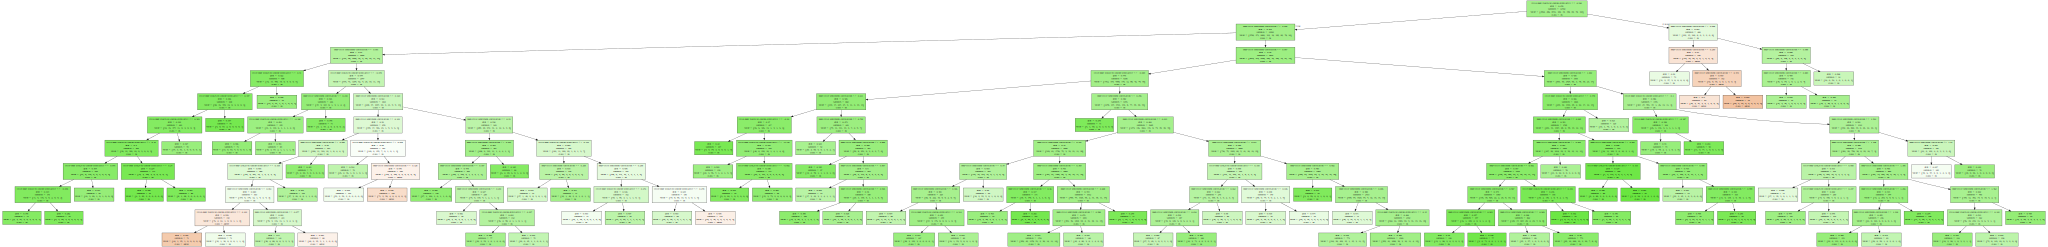

In [89]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import display
from graphviz import Digraph
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=70)
clf_gini.fit(x_train, y_train)

# class labels
training_fields = ['title-body Doc2Vec-cosine-similarity', 'body-title sentiment-correlation']
labels = training_fields[0:] # "type" is the third column

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['agree','bias','bs','conspiracy','fake', 'hate', 'junksci','satire type', 'state'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [90]:
y_pred = clf_gini.predict(x_test)
y_pred

array(['bs', 'bs', 'bs', ..., 'bs', 'bs', 'bs'], dtype=object)

In [91]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  68.6305233469132


In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       726
       bias       0.00      0.00      0.00        68
         bs       0.69      1.00      0.82      2198
 conspiracy       0.00      0.00      0.00        92
       hate       0.00      0.00      0.00        48
    junksci       0.00      0.00      0.00        18
     satire       0.00      0.00      0.00        22
      state       0.00      0.00      0.00        19

avg / total       0.47      0.69      0.56      3191



/Users/Soheil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Making 10 dimensional vectors (based on the 10 LDA topics) for each title and each body

I calculated 2 different types of LDA, based on bow (Bag of words) and based on TF-IDF, for titles and bodies. Here, I construct two 10-dimensional vectors for each title and each body based on the two LDA-models. Later, I calculate the cosine similarity between each of these vectors in title-body pairs and add them to the dataframe as a new column. These two new columns will be later used for classification of news. The idea here is to study whether these two different types of LDA could help in improving the result in classification of news, if they would be used for calculation of body-titles correlations.


In [93]:
# Testing a conversion of LDA/TF-IDF to vector for a sinlge body; doc#2323
vector2323 = bodies_lda_model_tfidf[bodies_bow_corpus[1]]
print(vector2323)
print(vector2323[0][1])

[(3, 0.36427945), (6, 0.6304911)]
0.36427945


In [94]:
titles_lda_bow_vectors = [[0] * 10 for i1 in range(preprocessed_titles.size)]
bodies_lda_bow_vectors = [[0] * 10 for i1 in range(preprocessed_titles.size)]
titles_lda_tfidf_vectors = [[0] * 10 for i1 in range(preprocessed_titles.size)]
bodies_lda_tfidf_vectors = [[0] * 10 for i1 in range(preprocessed_titles.size)]
# print(bodies_lda_tfidf_vectors[1500][0])

#def doc_to_ten_dimensional_LDA_vectors(corpus_element):
for i in range(len(preprocessed_titles)):
    title_lda_bow_vector = titles_lda_model_bow[titles_bow_corpus[i]]
    body_lda_bow_vector = bodies_lda_model_bow[bodies_bow_corpus[i]]
    title_lda_tfidf_voctor = titles_lda_model_tfidf[titles_bow_corpus[i]]
    body_lda_tfidf_vector = bodies_lda_model_tfidf[bodies_bow_corpus[i]]
    for j in range(len(title_lda_bow_vector)):
        titles_lda_bow_vectors[i][title_lda_bow_vector[j][0]] = title_lda_bow_vector[j][1]
    for k in range(len(body_lda_bow_vector)):
        bodies_lda_bow_vectors[i][body_lda_bow_vector[k][0]] = body_lda_bow_vector[k][1]
    for l in range(len(title_lda_tfidf_voctor)):
        titles_lda_tfidf_vectors[i][title_lda_tfidf_voctor[l][0]] = title_lda_tfidf_voctor[l][1]
    for m in range(len(body_lda_tfidf_vector)):
        bodies_lda_tfidf_vectors[i][body_lda_tfidf_vector[m][0]] = body_lda_tfidf_vector[m][1]

### lda_bow_vectors for titles

In [95]:
titles_lda_bow_vectors # testing one of the constructed vectors

[[0.016671041,
  0.01666897,
  0.016676506,
  0.016669475,
  0.23426355,
  0.016673122,
  0.016681751,
  0.6323557,
  0.016669588,
  0.016670361],
 [0.014292322,
  0.01428596,
  0.014287324,
  0.014285853,
  0.014285759,
  0.20133679,
  0.014286059,
  0.014289929,
  0.014286212,
  0.6843638],
 [0.014287659,
  0.014286971,
  0.014287307,
  0.014290344,
  0.014287942,
  0.014290122,
  0.014287311,
  0.014288653,
  0.014286834,
  0.8714069],
 [0, 0, 0.27995282, 0, 0, 0, 0, 0, 0, 0.65336084],
 [0.0100004785,
  0.01000079,
  0.90998757,
  0.010000722,
  0.010000296,
  0.010002101,
  0.01000137,
  0.010004577,
  0.010001565,
  0.010000512],
 [0.0125010125,
  0.0125008905,
  0.012505875,
  0.012501278,
  0.6969157,
  0.20305842,
  0.0125072,
  0.012503192,
  0.012501171,
  0.0125052845],
 [0, 0, 0, 0.088046655, 0, 0, 0, 0, 0.099209405, 0.78091484],
 [0, 0, 0.30420005, 0, 0, 0, 0, 0, 0.6487287, 0],
 [0, 0.13325836, 0, 0, 0, 0, 0.79399294, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9399868],
 [0.

### lda_bow_vectors for bodies

In [96]:
bodies_lda_bow_vectors # testing one of the constructed vectors

[[0, 0, 0, 0, 0, 0, 0, 0, 0.55313885, 0.42399833],
 [0, 0, 0, 0, 0, 0, 0, 0.31026992, 0.6123276, 0.07282647],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9909073, 0],
 [0, 0, 0.28613436, 0, 0, 0.10046137, 0, 0, 0.587473, 0],
 [0, 0, 0, 0.99457717, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.20119442, 0, 0, 0, 0.79153156, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9979017, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9959452, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.99142724, 0],
 [0.42477727, 0, 0, 0.13354234, 0, 0.18330418, 0, 0, 0.24746463, 0],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 [0, 0, 0, 0.748005, 0, 0.16119328, 0, 0, 0.088327646, 0],
 [0,
  0,
  0.08536797,
  0.03889429,
  0.1843504,
  0,
  0.19799957,
  0.06259541,
  0.429681,
  0],
 [0, 0, 0, 0.79461384, 0, 0, 0, 0, 0.2015577, 0],
 [0.35221383, 0, 0, 0, 0, 0, 0, 0, 0.60332865, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.96249384, 0],
 [0.35216463, 0, 0, 0, 0, 0, 0, 0, 0.6033779, 0],
 [0, 0, 0, 0.5681304, 0, 0, 0, 0, 0.42172897, 0],
 [0.14683786, 0, 0, 0.62476975, 0, 0, 0.08197526

### lda_tfidf_vectors for titles

In [97]:
titles_lda_tfidf_vectors # testing one of the constructed vectors

[[0.01667183,
  0.016669072,
  0.016670316,
  0.01666886,
  0.8499689,
  0.016669564,
  0.016672535,
  0.016669411,
  0.016669894,
  0.016669568],
 [0.014285961,
  0.014286331,
  0.014287461,
  0.0142863635,
  0.014287612,
  0.014286072,
  0.014292765,
  0.014287117,
  0.87141377,
  0.014286577],
 [0.014287725,
  0.01428883,
  0.014287964,
  0.014287897,
  0.014290814,
  0.01428748,
  0.87140507,
  0.014288172,
  0.014288118,
  0.014287941],
 [0, 0.23782778, 0, 0.695493, 0, 0, 0, 0, 0, 0],
 [0.010001869,
  0.010003114,
  0.010008041,
  0.010003871,
  0.2898562,
  0.6301162,
  0.010002884,
  0.010003829,
  0.010002456,
  0.010001495],
 [0.012502089,
  0.88747483,
  0.012503933,
  0.012503617,
  0.012502522,
  0.012502159,
  0.012502871,
  0.012503159,
  0.012502781,
  0.012502042],
 [0, 0.2948405, 0.16319434, 0, 0, 0.09191908, 0.42276612, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.9470355, 0, 0],
 [0, 0, 0.6566284, 0, 0, 0, 0, 0, 0, 0.2706225],
 [0.93998075, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0111

### lda_tfidf_vectors for bodies

In [98]:
bodies_lda_tfidf_vectors # testing one of the constructed vectors

[[0, 0, 0, 0, 0, 0, 0.9742824, 0, 0, 0],
 [0, 0, 0, 0.36411643, 0, 0, 0.6306541, 0, 0, 0],
 [0, 0, 0, 0.6854371, 0, 0.09637471, 0.2111166, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.7880917, 0.18227342, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.99457765, 0, 0, 0],
 [0, 0.22762781, 0, 0, 0, 0, 0.76509833, 0, 0, 0],
 [0, 0, 0, 0.26768064, 0, 0.32580584, 0.40488157, 0, 0, 0],
 [0, 0, 0.037206043, 0, 0, 0.06619091, 0.7511528, 0, 0.14274709, 0],
 [0, 0, 0, 0.9914274, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.20639156, 0.77906096, 0, 0, 0],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 [0.06829667, 0, 0, 0, 0, 0.035699517, 0.89352965, 0, 0, 0],
 [0, 0, 0.06554843, 0, 0, 0, 0.91684735, 0, 0, 0],
 [0, 0, 0, 0.020116806, 0, 0, 0.9760548, 0, 0, 0],
 [0, 0, 0.2864475, 0, 0, 0, 0.66909933, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.8234719, 0, 0.14318912, 0],
 [0, 0, 0.28650993, 0, 0, 0, 0.6690369, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.27510035, 0.7216991, 0, 0, 0],
 [0, 0.07127124, 0, 0.026296144, 0, 0, 0.89612544, 0, 0, 0],
 [0, 0, 0,

# Calculating cosine similarity between titles and bodies based on the each type of 10-dimensional LDA vectors and adding two new columns based on them to the dataframe

Now, after converting each title and each body to 10-dimensional vectors based on the bow-based and tfidf-based LDA, I can calculate the relationship between each title/body using cosine similarity and add the result to the dataframe as a column. 

### Note: Clearly this cosine similarity can also be calculated between any of the two documents (titles or bodies) in the dataset and should not be necessary limited to the title-body relation of one single document


In [100]:
#Add a new column to the dataframe with the default value of 0
all_data['lda-bow title-body-correlation'] = '0'
all_data['lda-tfidf title-body-correlation'] = '0'

import numpy as np
from scipy.spatial import distance

for index in range(len(preprocessed_titles)):
    all_data['lda-bow title-body-correlation'][index] = distance.cosine(titles_lda_bow_vectors[index], bodies_lda_bow_vectors[index])
    all_data['lda-tfidf title-body-correlation'][index] = distance.cosine(titles_lda_tfidf_vectors[index], bodies_lda_tfidf_vectors[index])
    
all_data.head()

title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text  type  \
0  Print They should pay all the back all the mon...  bias   
1  Why Did Attorney General Loretta Lynch Plead T...  bias   
2  Red State : \nFox News Sunday reported this mo...  bias   
3  Email Kayla Mueller was a prisoner and torture...  bias   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  bias   

  title-body Doc2Vec-cosine-similarity title sentiment body sentiment  \
0                             0.431159         -0.0516         -0.802   
1                             0.133195               0         -0.296   
2                              0.12188               0         0.9042   
3                             0.269044         -0.7783         0.6908   
4                             0.207215               0         0.9517   

  body-title sentiment-correlation lda-bow title-body-correlation  \
0                           0.7504                       0.965427   
1                            0.296                       0.872226   
2                           0.9042                       0.983625   
3                           1.4691                       0.829543   
4                           0.9517                       0.989016   

  lda-tfidf title-body-correlation  
0                         0.980418  
1                         0.977625  
2                         0.690925  
3                                1  
4                          0.98559

In [101]:
all_data.to_csv('../G-Colab/golnaz_body-title_correlation.csv', encoding='utf-8')

# Naive Baise on lda-bow title-body-correlation & lda-tfidf title-body-correlation

In [102]:
all_data_shuffled=all_data.sample(frac=1)

x_train = all_data_shuffled.values[:12760, [7,8]]
y_train = all_data_shuffled.values[:12760,2]

x_test = all_data_shuffled.values[12760:, [7,8]]
y_test = all_data_shuffled.values[12760:,2]

#x_train= [x_train.astype('float')]
#x_test=[x_test.astype('float')]

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)

predictions = NaiveBayes.predict(x_test)

print(confusion_matrix(y_test,predictions))

[[   0    0  734    0    0    0    0    0    0]
 [   0    0   61    0    0    0    0    0    0]
 [   0    0 2214    0    0    0    0    0    0]
 [   0    0   79    0    0    0    0    0    0]
 [   0    0    4    0    0    0    0    0    0]
 [   0    0   36    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0]
 [   0    0   27    0    0    0    0    0    0]
 [   0    0   19    0    0    0    0    0    0]]


In [154]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7141961767471012


In [103]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       734
       bias       0.00      0.00      0.00        61
         bs       0.69      1.00      0.82      2214
 conspiracy       0.00      0.00      0.00        79
       fake       0.00      0.00      0.00         4
       hate       0.00      0.00      0.00        36
    junksci       0.00      0.00      0.00        17
     satire       0.00      0.00      0.00        27
      state       0.00      0.00      0.00        19

avg / total       0.48      0.69      0.57      3191



/Users/Soheil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network

In [110]:
# Importing Keras Sequential Model
from keras.models import Sequential
from keras.layers import Dense
import numpy

# Initializing the seed value to a integer.
seed = 7

numpy.random.seed(seed)
#Converting labels (types) to numeric
def label_to_numeric(label):
    if label=="agree":
        return(100)
    elif label=="satire type":
        return(75)
    elif label=="state":
        return(66)
    elif label=="bs":
        return(50)
    elif label=="bias":
        return(50)
    elif label=="junksci":
        return(20)
    elif label=="fake":
        return(0)
    elif label=="conspiracy":
        return(-25)
    elif label=="hate":
        return(-50)
    else:
        return(0)

all_data['label-type'] = all_data['type'].apply(lambda x : label_to_numeric(x))
all_data.head()


# Loading the input values to X and Label values Y using slicing.
all_data_shuffled=all_data.sample(frac=1)


X = all_data_shuffled.values[:, 3:9]
Y = all_data_shuffled.values[:,9]
X=X.astype('float')
Y=Y.astype('float')

# Initializing the Sequential model from KERAS.
model = Sequential()

# Creating a 16 neuron hidden layer with Linear Rectified activation function.
model.add(Dense(10, input_dim=6, init='uniform', activation='relu'))

# Creating a 8 neuron hidden layer.
model.add(Dense(5, init='uniform', activation='relu'))

# Adding a output layer.
model.add(Dense(1, init='uniform', activation='sigmoid'))



# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Fitting the model
model.fit(X, Y, nb_epoch=5, batch_size=10)

scores = model.evaluate(X, Y)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=6, activation="relu", kernel_initializer="uniform")`
/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
/Users/Soheil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/5
15951/15951 [==============================] - 3s 167us/step - loss: -749.5195 - acc: 0.0000e+00
Epoch 2/5
15951/15951 [==============================] - 2s 148us/step - loss: -902.3159 - acc: 0.0000e+00
Epoch 3/5
15951/15951 [==============================] - 2s 150us/step - loss: -902.4120 - acc: 0.0000e+00
Epoch 4/5
15951/15951 [==============================] - 2s 151us/step - loss: -902.4353 - acc: 0.0000e+00
Epoch 5/5
15951/15951 [==============================] - 0s 20us/step
acc: 0.00%


# Random Forrest Classifier

In [148]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [150]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7141961767471012


In [151]:
print(confusion_matrix(y_test,predictions))

[[   0    0  734    0    0    0    0    0    0]
 [   0    0   61    0    0    0    0    0    0]
 [   0    0 2214    0    0    0    0    0    0]
 [   0    0   79    0    0    0    0    0    0]
 [   0    0    4    0    0    0    0    0    0]
 [   0    0   36    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0]
 [   0    0   27    0    0    0    0    0    0]
 [   0    0   19    0    0    0    0    0    0]]


In [153]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      agree       0.00      0.00      0.00       734
       bias       0.00      0.00      0.00        61
         bs       0.69      1.00      0.82      2214
 conspiracy       0.00      0.00      0.00        79
       fake       0.00      0.00      0.00         4
       hate       0.00      0.00      0.00        36
    junksci       0.00      0.00      0.00        17
     satire       0.00      0.00      0.00        27
      state       0.00      0.00      0.00        19

avg / total       0.48      0.69      0.57      3191



/Users/Soheil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Testing the model on unseen document using cosine similarity between title-body vectors of  different documents

So far, I constructed different vectors for describing the correlation between titels and body of a single document and evaluated different classifiers to predict the type of news based on this factors. 

Here, I'm going to calculate the cosine similarity between two "agree" documents in order to show that the constructed vectors can also be used to compare two different documents directly. This can be seen as the usage of prototype in cognitive science (see https://en.wikipedia.org/wiki/Prototype_theory) in categorization of news.  My assumption is that fake news or non-fake news (agree, in this case) have similarities which could be calculated based on the cosine similarities between the vectors that represent different aspects/features of that documents. 

In my test, I have picked up the document #15000 and aim to test whether I can judge the type of document #15360 based on the cosine similarity between the title-body-correlation vector of these two documents.

In [144]:
iconic_news_1_id = 15000; #iconic doc 1 is doc#15000


target_news_2_id = 15360; #target doc 2 is doc#15360


print(all_data["type"][iconic_news_1_id])

agree


In [145]:
title_body_vector_doc1=[all_data["title-body Doc2Vec-cosine-similarity"][iconic_news_1_id], all_data["body-title sentiment-correlation"][iconic_news_1_id], all_data["lda-bow title-body-correlation"][iconic_news_1_id], all_data["lda-tfidf title-body-correlation"][iconic_news_1_id]] 
title_body_vector_doc2=[all_data["title-body Doc2Vec-cosine-similarity"][target_news_2_id], all_data["body-title sentiment-correlation"][target_news_2_id], all_data["lda-bow title-body-correlation"][target_news_2_id], all_data["lda-tfidf title-body-correlation"][target_news_2_id]] 


print("cosine similarity between these two agree documents: ", distance.cosine(title_body_vector_doc1, title_body_vector_doc2))



cosine similarity between these two agree documents:  0.7274521881792855


As it is clear **0.7274521881792855** is a very good cosine similarity. Therefore, my interpretation is that the document should be classified as "agree".

In [146]:
print(all_data["type"][target_news_2_id])

agree


At least in this particular case, I could correctly categorize a document based on the cosine similarity of their title-body-corelation vectors.